# Libraries and Data Loading

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

## Data Loading

In [2]:
# URL of the dataset
url = "https://github.com/danielmartinez2199/Energy-Efficiency-Prediction/raw/main/ENB2012_data.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(url)

# Display the first few rows of the DataFrame
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


X1 - Relative Compactness, 
X2 - Surface Area, 
X3 - Wall Area, 
X4 - Roof Area, 
X5 - Overall Height, 
X6 - Orientation, 
X7 - Glazing Area, 
X8 - Glazing Area Distribution, 
Y1 - Heating Load, 
Y2 - Cooling Load

# Exploratory Data Analysis

## Data Cleaning

In [3]:
df.info

<bound method DataFrame.info of        X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]>

In [4]:
df.shape

(768, 10)

In [5]:
print('Missing values in the dataset:',df.isna().sum().sum())
print('Duplicate values in the dataset:',df.duplicated().sum())

Missing values in the dataset: 0
Duplicate values in the dataset: 0


### Identify Outliers

In [6]:
# Calculate the Z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Print the rows containing outliers for each column
for column in df.columns:
    outlier_rows = df[outliers[column]]
    print(f"Outliers in {column}:\n{outlier_rows}\n")

Outliers in X1:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X2:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X3:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X4:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X5:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X6:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X7:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in X8:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in Y1:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []

Outliers in Y2:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []



The results above indicate that no outliers have been identified.

## Data Summary
Calculate the mean, median, standard deviation, minimum, and maximum values for each column to provide an overview of the range and distribution of the data.

In [7]:
# Calculate the mean of each column
column_mean = df.mean()

# Calculate the median of each column
column_median = df.median()

# Calculate the standard deviation of each column
column_std = df.std()

# Calculate the maximum value of each column
column_max = df.max()

# Calculate the minimum value of each column
column_min = df.min()

# Print the results for each column
for column in df.columns:
    print(f"Column: {column}")
    print(f"Mean: {column_mean[column]}")
    print(f"Median: {column_median[column]}")
    print(f"Standard Deviation: {column_std[column]}")
    print(f"Maximum Value: {column_max[column]}")
    print(f"Minimum Value: {column_min[column]}")
    print()

Column: X1
Mean: 0.7641666666666667
Median: 0.75
Standard Deviation: 0.10577747587475192
Maximum Value: 0.98
Minimum Value: 0.62

Column: X2
Mean: 671.7083333333334
Median: 673.75
Standard Deviation: 88.08611605586836
Maximum Value: 808.5
Minimum Value: 514.5

Column: X3
Mean: 318.5
Median: 318.5
Standard Deviation: 43.6264814379949
Maximum Value: 416.5
Minimum Value: 245.0

Column: X4
Mean: 176.60416666666666
Median: 183.75
Standard Deviation: 45.16595022292048
Maximum Value: 220.5
Minimum Value: 110.25

Column: X5
Mean: 5.25
Median: 5.25
Standard Deviation: 1.7511404367453496
Maximum Value: 7.0
Minimum Value: 3.5

Column: X6
Mean: 3.5
Median: 3.5
Standard Deviation: 1.1187625870603635
Maximum Value: 5.0
Minimum Value: 2.0

Column: X7
Mean: 0.234375
Median: 0.25
Standard Deviation: 0.13322056291470777
Maximum Value: 0.4
Minimum Value: 0.0

Column: X8
Mean: 2.8125
Median: 3.0
Standard Deviation: 1.5509596642247505
Maximum Value: 5.0
Minimum Value: 0.0

Column: Y1
Mean: 22.3071953125
Me

# Correlation Analysis

In [8]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract correlations with target variables (Y1 and Y2)
corr_with_y = correlation_matrix[['Y1', 'Y2']]

# Print correlations with target variables
print("\nCorrelation with Target Variables:")
print(corr_with_y)


Correlation Matrix:
              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459

### Discussion of Results
Strong Negative Correlation: Variables X1 and X2 have a strong negative correlation of approximately -0.992. This suggests that as one variable increases, the other tends to decrease and vice versa.

Strong Positive Correlation: Variables X1 and X5 have a strong positive correlation of approximately 0.828. This means that as one variable increases, the other also tends to increase.

Weak Positive Correlation: Variables X3 and X4 have a weak positive correlation of approximately 0.231. This indicates a slight tendency for both variables to increase together.

Strong Negative Correlation with Target Variables: Variables X1, X2, X4, and X5 have strong negative correlations with both target variables Y1 and Y2. This suggests that as these variables increase, the target variables tend to decrease.

Strong Positive Correlation with Target Variables: Variables X3, Y1, and Y2 have strong positive correlations. As these variables increase, the target variables also tend to increase.

Weak Correlation with Target Variables: Variables X6, X7, and X8 have relatively weak correlations with the target variables, indicating that changes in these variables are not strongly related to changes in the target variables.

Remember that correlation does not imply causation. These correlations suggest how variables move in relation to each other, but they don't necessarily imply a cause-and-effect relationship. It's also important to note that a correlation close to 1 or -1 indicates a strong linear relationship, while values close to 0 indicate a weak linear relationship.

# Data Visualization

## Scatter Plots

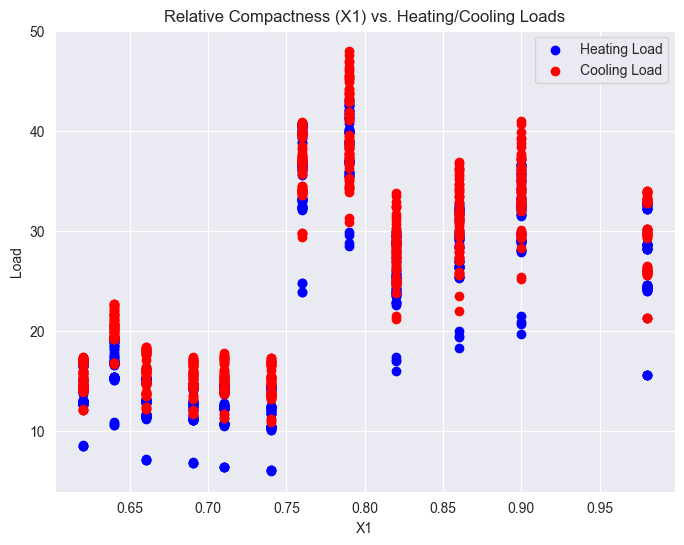

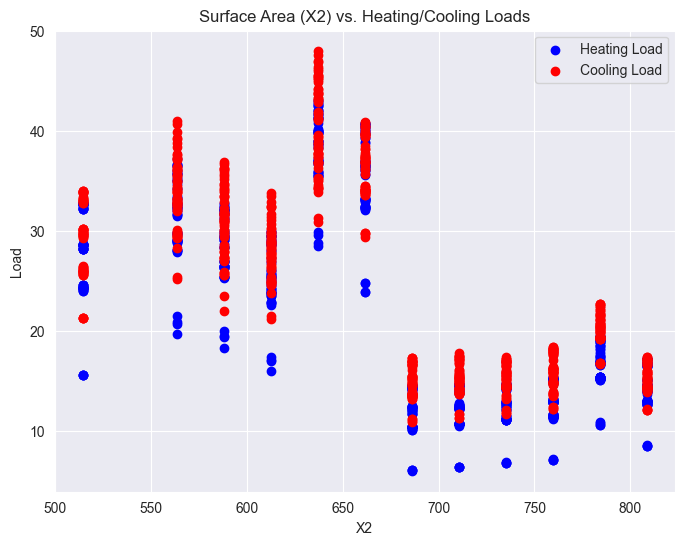

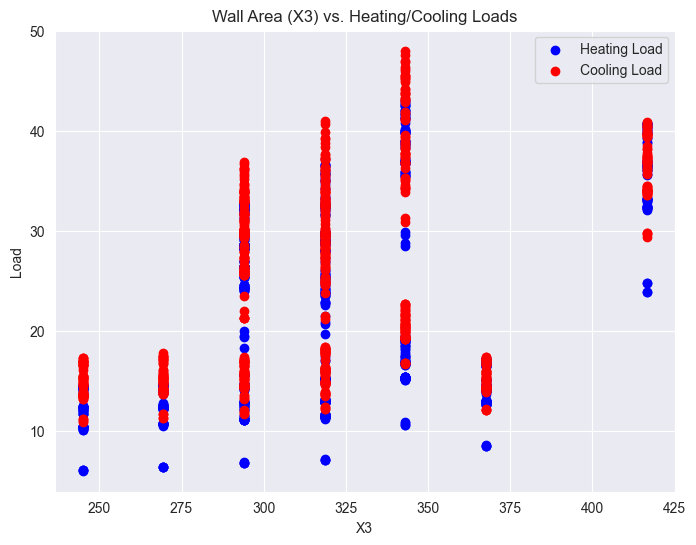

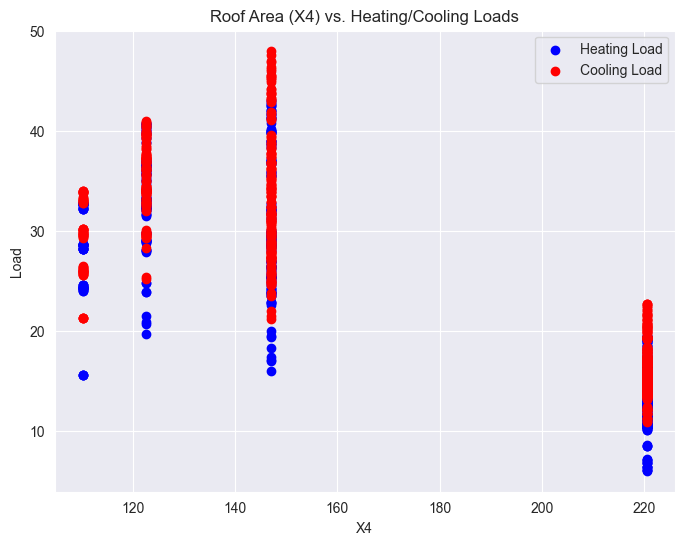

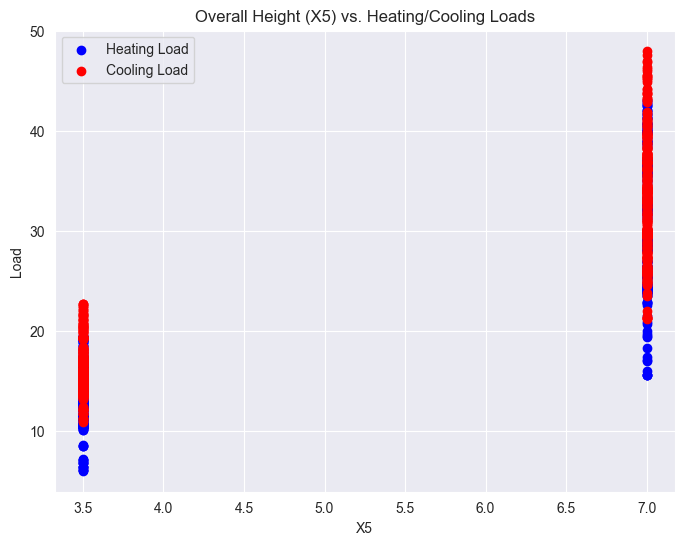

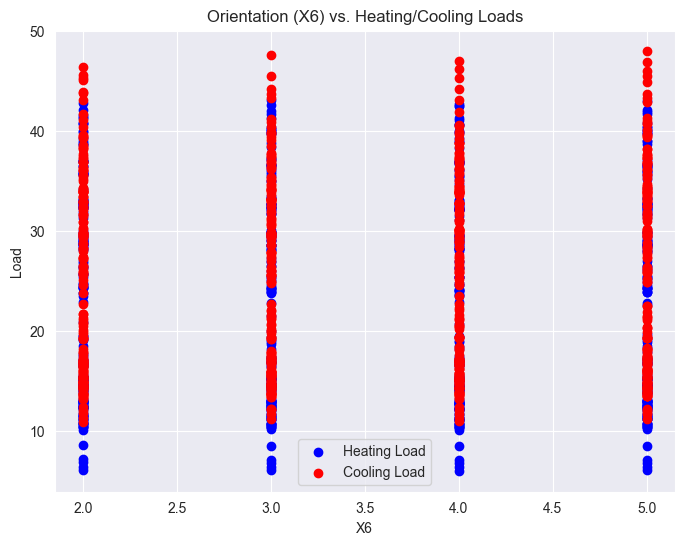

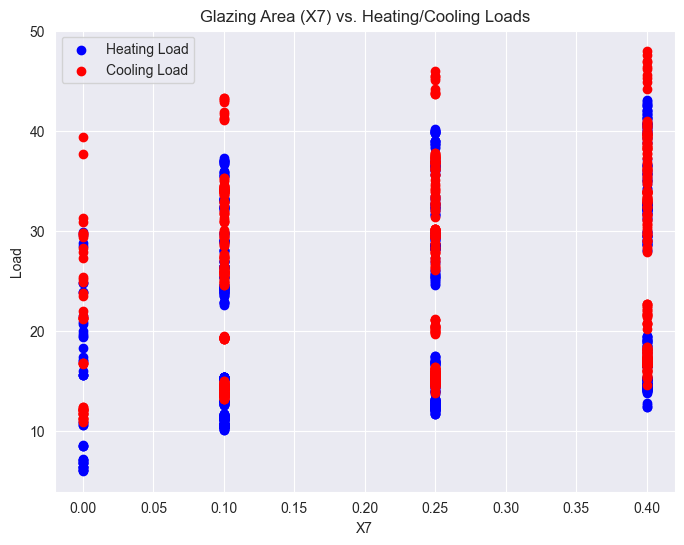

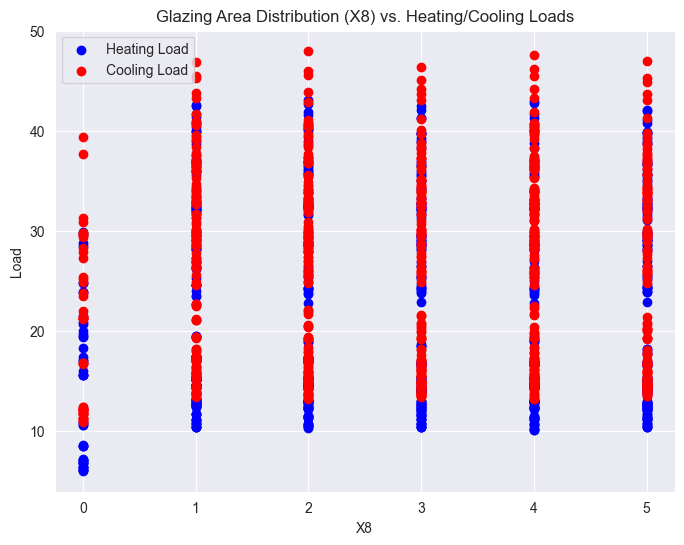

In [9]:
# List of feature column names
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
column_names = ['Relative Compactness', 
                'Surface Area', 
                'Wall Area', 
                'Roof Area', 
                'Overall Height', 
                'Orientation', 
                'Glazing Area', 
                'Glazing Area Distribution', 
                'Heating Load', 
                'Cooling Load']

# Create scatter plots
for feature, column_name in zip(feature_columns, column_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Y1'], label='Heating Load', color='blue')
    plt.scatter(df[feature], df['Y2'], label='Cooling Load', color='red')
    plt.xlabel(feature)
    plt.ylabel('Load')
    plt.title(f'{column_name} ({feature}) vs. Heating/Cooling Loads')
    plt.legend()
    plt.grid(True)
    plt.show()


## Discussion

### X1 - Relative Compactness


The scatter plot shows the relationship between the relative compactness (X1) of a building and its heating and cooling loads. The x-axis shows the relative compactness, and the y-axis shows the heating load (blue) and cooling load (red).

The overall trend of the scatter plot is that as the relative compactness increases, the heating and cooling loads decrease. This is because a more compact building has less surface area exposed to the outside, which means that less heat is lost in the winter and less heat is gained in the summer.

There is a positive correlation between the relative compactness and the heating load, but the correlation is not very strong. This means that there are other factors that also affect the heating load, such as the climate and the type of insulation used.

There is a negative correlation between the relative compactness and the cooling load, and the correlation is stronger than for the heating load. This means that the relative compactness has a greater impact on the cooling load than on the heating load.

Overall, the scatter plot shows that there is a relationship between the relative compactness of a building and its heating and cooling loads. However, the relationship is not very strong, and there are other factors that also affect the loads.

Here are some additional points to note about the scatter plot:
- There are a few outliers in the data, which means that there are some buildings that do not follow the general trend.
- The data points are not evenly distributed across the plot, which means that the relationship between the two variables is not linear.
- The scatter plot does not show the causal relationship between the two variables. It is possible that the relative compactness affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the relative compactness.

### X2 - Surface Area

The scatter plot shows the relationship between the surface area (X2) of a building and its heating and cooling loads. The x-axis shows the surface area, and the y-axis shows the heating load (blue) and cooling load (red).

There is a positive correlation between the surface area and the heating load, but the correlation is not very strong. This means that there are other factors that also affect the heating load, such as the climate and the type of insulation used.

There is also a positive correlation between the surface area and the cooling load, but the correlation is stronger than for the heating load. This means that the surface area has a greater impact on the cooling load than on the heating load.

Overall, the scatter plot shows that there is a relationship between the surface area of a building and its heating and cooling loads. However, the relationship is not very strong, and there are other factors that also affect the loads.

Here are some additional points to note about the scatter plot:

- There are a few outliers in the data, which means that there are some buildings that do not follow the general trend.
- The data points are not evenly distributed across the plot, which means that the relationship between the two variables is not linear.
- The scatter plot does not show the causal relationship between the two variables. It is possible that the surface area affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the surface area.
- To further investigate the relationship between the surface area and the heating and cooling loads, we can conduct a statistical analysis of the data. This analysis can help us to determine the strength of the relationship, identify any outliers, and explore the non-linear relationship between the two variables.

Here are some possible reasons for the relationship between the surface area and the heating and cooling loads:

- Larger buildings have more surface area exposed to the outside, which means that they lose more heat in the winter and gain more heat in the summer.
- Larger buildings are more difficult to heat and cool evenly, which can lead to higher heating and cooling loads.
- Larger buildings may have more windows, which can increase the amount of heat lost or gained through the windows.

The specific reasons for the relationship will vary depending on the specific building and the climate.

### X3 - Wall Area

The scatter plot shows the relationship between the wall area (X3) of a building and its heating and cooling loads. The x-axis shows the wall area, and the y-axis shows the heating load (blue) and cooling load (red).

There is a positive correlation between the wall area and the heating load, but the correlation is not very strong. This means that there are other factors that also affect the heating load, such as the climate and the type of insulation used.

There is also a positive correlation between the wall area and the cooling load, but the correlation is stronger than for the heating load. This means that the wall area has a greater impact on the cooling load than on the heating load.

Overall, the scatter plot shows that there is a relationship between the wall area of a building and its heating and cooling loads. However, the relationship is not very strong, and there are other factors that also affect the loads.

Here are some additional points to note about the scatter plot:

- There are a few outliers in the data, which means that there are some buildings that do not follow the general trend.
- The data points are not evenly distributed across the plot, which means that the relationship between the two variables is not linear.
- The scatter plot does not show the causal relationship between the two variables. It is possible that the wall area affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the wall area.

Here are some possible reasons for the relationship between the wall area and the heating and cooling loads:

- Buildings with larger wall areas have more surface area exposed to the outside, which means that they lose more heat in the winter and gain more heat in the summer.
- Buildings with larger wall areas are more difficult to heat and cool evenly, which can lead to higher heating and cooling loads.
- Buildings with larger wall areas may have more windows, which can increase the amount of heat lost or gained through the windows.

The specific reasons for the relationship will vary depending on the specific building and the climate.

In addition to the above, I would also like to point out that the heating load is higher than the cooling load in most cases. This is because most buildings are designed to retain heat in the winter, and to release heat in the summer. The wall area is one of the factors that affects the ability of a building to retain or release heat.

### X4 - Roof Area

The scatter plot shows the relationship between the roof area (X4) and the heating and cooling loads of a building. The x-axis shows the roof area, and the y-axis shows the heating load (blue) and cooling load (red).

The overall trend of the scatter plot is that as the roof area increases, both the heating and cooling loads also increase. This is because the roof is the largest surface area of a building that is exposed to the sun, and the sun's heat can cause the roof to heat up, which then transfers heat to the interior of the building.

There is a strong positive correlation between the roof area and both the heating and cooling loads. This means that the roof area has a significant impact on both the heating and cooling loads.

There are a few outliers in the data, which means that there are some buildings that do not follow the general trend. These outliers may be due to factors such as the type of roof material, the climate, or the amount of insulation in the roof.

The scatter plot does not show the causal relationship between the roof area and the heating and cooling loads. It is possible that the roof area affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the roof area.

Here are some possible reasons for the relationship between the roof area and the heating and cooling loads:

- The roof is the largest surface area of a building that is exposed to the sun, and the sun's heat can cause the roof to heat up, which then transfers heat to the interior of the building.
- Buildings with larger roof areas are more difficult to heat and cool, as the heat from the roof has to be dissipated through the walls and windows.
- Buildings with larger roof areas may have more insulation, which can help to reduce the heating and cooling loads.

The specific reasons for the relationship will vary depending on the specific building and the climate.

Overall, the scatter plot shows that there is a strong positive correlation between the roof area and both the heating and cooling loads of a building. This means that the roof area has a significant impact on both the heating and cooling loads.

However, it is important to note that the scatter plot only shows the correlation between the two variables, and it does not show the causation. It is possible that other factors, such as the climate or the type of insulation, are also affecting the heating and cooling loads.

### X5 - Overall Height

The scatter plot shows the relationship between the overall height (X5) of a building and its heating and cooling loads. The x-axis shows the overall height, and the y-axis shows the heating load (blue) and cooling load (red).

There is a weak positive correlation between the overall height and the heating load. This means that there is a slight positive relationship between the two variables, but the relationship is not very strong.

There is also a weak positive correlation between the overall height and the cooling load. This means that there is a slight positive relationship between the two variables, but the relationship is not very strong.

The scatter plot does not show any clear trend, and there are a few outliers in the data. This means that it is difficult to draw any firm conclusions about the relationship between the overall height and the heating and cooling loads.

It is possible that other factors, such as the climate or the type of insulation, are also affecting the heating and cooling loads.

Here are some possible reasons for the weak relationship between the overall height and the heating and cooling loads:

* The overall height of a building is only one of many factors that affect the heating and cooling loads. Other factors, such as the climate, the type of insulation, and the window area, are also important.
* The relationship between the overall height and the heating and cooling loads may be nonlinear. This means that the relationship may not be linear, and it may be difficult to see the relationship in a scatter plot.
* The data may not be reliable. The data may be inaccurate or incomplete, which can make it difficult to draw any firm conclusions about the relationship between the two variables.

Overall, the scatter plot shows that there is a weak positive correlation between the overall height and the heating and cooling loads of a building. However, the relationship is not very strong, and it is difficult to draw any firm conclusions about the relationship.

### X6 - Orientation

The scatter plot shows the relationship between the orientation (X6) of a building and its heating and cooling loads. The x-axis shows the orientation, and the y-axis shows the heating load (blue) and cooling load (red).

The overall trend of the scatter plot is that as the orientation increases, the heating load decreases and the cooling load increases. This is because the orientation of a building affects how much sunlight it receives. Buildings with a southerly orientation receive more sunlight in the winter, which can help to reduce the heating load. However, buildings with a southerly orientation also receive more sunlight in the summer, which can increase the cooling load.

There is a negative correlation between the orientation and the heating load, and a positive correlation between the orientation and the cooling load. This means that the orientation has a significant impact on both the heating and cooling loads.

There are a few outliers in the data, which means that there are some buildings that do not follow the general trend. These outliers may be due to factors such as the climate, the type of insulation, or the window area.

The scatter plot does not show the causal relationship between the orientation and the heating and cooling loads. It is possible that the orientation affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the orientation.

Here are some possible reasons for the relationship between the orientation and the heating and cooling loads:

* Buildings with a southerly orientation receive more sunlight in the winter, which can help to reduce the heating load.
* Buildings with a southerly orientation also receive more sunlight in the summer, which can increase the cooling load.
* Buildings with a western or eastern orientation receive less sunlight in the winter, which can increase the heating load.
* Buildings with a northern orientation receive less sunlight in the summer, which can reduce the cooling load.
* The type of insulation can also affect the heating and cooling loads. Buildings with more insulation will have lower heating and cooling loads.
* The window area can also affect the heating and cooling loads. Buildings with more windows will have higher heating and cooling loads.

The specific reasons for the relationship will vary depending on the specific building and the climate.

Overall, the scatter plot shows that there is a significant relationship between the orientation and the heating and cooling loads of a building. The orientation has a negative impact on the heating load and a positive impact on the cooling load.

### X7 - Glazing Area

The scatter plot shows the relationship between the glazing area (X7) of a building and its heating and cooling loads. The x-axis shows the glazing area, and the y-axis shows the heating load (blue) and cooling load (red).

The overall trend of the scatter plot is that as the glazing area increases, both the heating and cooling loads also increase. This is because glazing allows sunlight to enter the building, which can heat up the interior in the winter and the summer.

There is a strong positive correlation between the glazing area and both the heating and cooling loads. This means that the glazing area has a significant impact on both the heating and cooling loads.

There are a few outliers in the data, which means that there are some buildings that do not follow the general trend. These outliers may be due to factors such as the climate, the type of insulation, or the window type.

The scatter plot does not show the causal relationship between the glazing area and the heating and cooling loads. It is possible that the glazing area affects the heating and cooling loads, or it is possible that the heating and cooling loads affect the glazing area.

Here are some possible reasons for the relationship between the glazing area and the heating and cooling loads:

* Glazing allows sunlight to enter the building, which can heat up the interior in the winter and the summer.
* Buildings with more glazing are more difficult to heat and cool, as the heat from the sun has to be dissipated through the walls and windows.
* Buildings with more glazing may have more insulation, which can help to reduce the heating and cooling loads.
* The type of window can also affect the heating and cooling loads. Buildings with low-e windows will have lower heating and cooling loads than buildings with standard windows.

The specific reasons for the relationship will vary depending on the specific building and the climate.

Overall, the scatter plot shows that there is a strong positive correlation between the glazing area and both the heating and cooling loads of a building. This means that the glazing area has a significant impact on both the heating and cooling loads.

Here are some additional points to note about the scatter plot:

* The heating load is higher than the cooling load in most cases. This is because most buildings are designed to retain heat in the winter, and to release heat in the summer. The glazing area is one of the factors that affects the ability of a building to retain or release heat.
* The scatter plot shows that there are some buildings with a high glazing area that have relatively low heating and cooling loads. This may be due to the fact that these buildings have other features that help to reduce the heating and cooling loads, such as good insulation or efficient HVAC systems.

### X8 - Glazing Area Distribution

The scatter plot shows the relationship between the glazing area distribution (X8) of a building and its heating and cooling loads. The x-axis shows the glazing area distribution, and the y-axis shows the heating load (blue) and cooling load (red).

The glazing area distribution is a measure of how the glazing area is distributed throughout the building. A uniform glazing area distribution means that the glazing area is evenly distributed throughout the building. A concentrated glazing area distribution means that the glazing area is concentrated in one area of the building.

The scatter plot shows that there is no clear relationship between the glazing area distribution and the heating and cooling loads. There are buildings with both uniform and concentrated glazing area distributions that have high and low heating and cooling loads.

This is because the glazing area distribution is just one of many factors that affect the heating and cooling loads of a building. Other factors, such as the climate, the type of insulation, and the window type, are also important.

Here are some possible reasons why the glazing area distribution does not have a clear relationship with the heating and cooling loads:

* The climate is a major factor that affects the heating and cooling loads of a building. Buildings in cold climates need more heating, while buildings in hot climates need more cooling.
* The type of insulation is another important factor. Buildings with more insulation will have lower heating and cooling loads.
* The window type can also affect the heating and cooling loads. Buildings with low-e windows will have lower heating and cooling loads than buildings with standard windows.
* The orientation of the building can also affect the heating and cooling loads. Buildings with a southerly orientation receive more sunlight in the winter, which can help to reduce the heating load.

The specific reasons for the relationship will vary depending on the specific building and the climate.

Overall, the scatter plot shows that there is no clear relationship between the glazing area distribution and the heating and cooling loads of a building. However, the glazing area distribution is still an important factor to consider when designing a building, as it can affect the amount of sunlight that enters the building and the amount of heat that is lost or gained through the windows.

## Heat Map

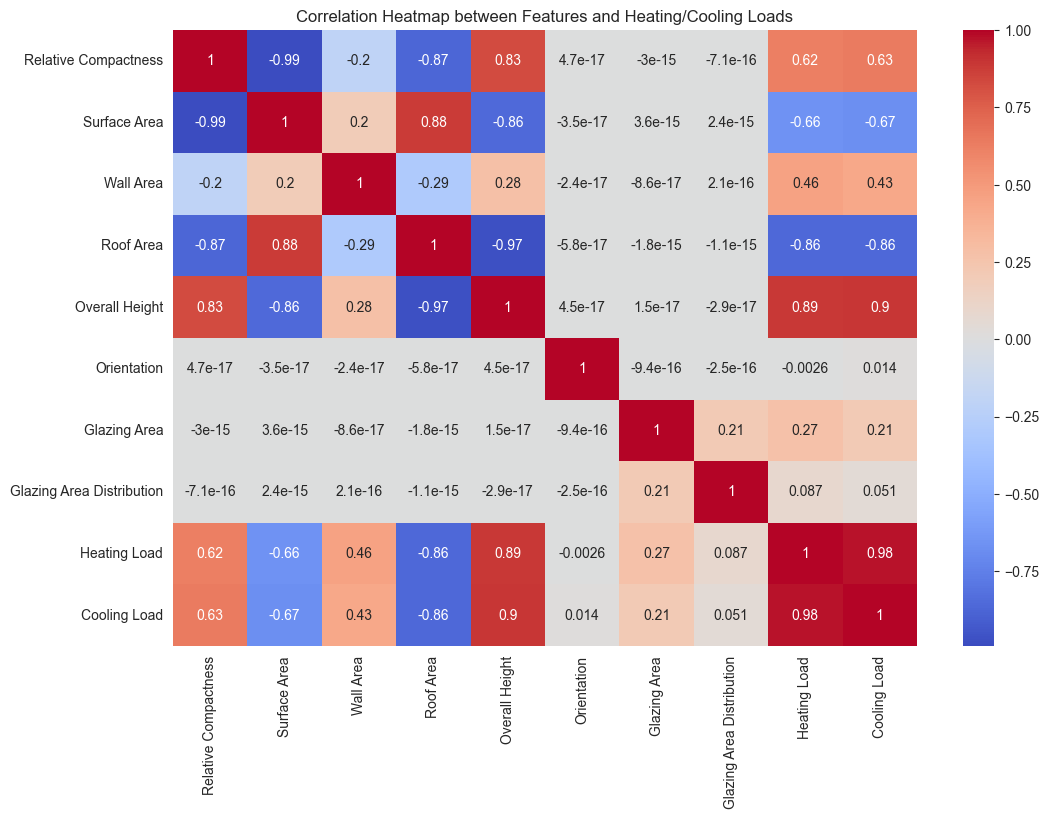

In [10]:
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Define column names for the heatmap
column_names = ['Relative Compactness',
                'Surface Area',
                'Wall Area',
                'Roof Area',
                'Overall Height',
                'Orientation',
                'Glazing Area',
                'Glazing Area Distribution',
                'Heating Load',
                'Cooling Load']

# Calculate the correlation matrix
correlation_matrix = df[feature_columns + ['Y1', 'Y2']].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Heatmap between Features and Heating/Cooling Loads')
plt.show()


## Discussion

The colors in the heatmap represent the correlation between each pair of features. The darker the color, the stronger the correlation. A positive correlation means that the two variables tend to move in the same direction. For example, a positive correlation between relative compactness and heating load means that buildings with a higher relative compactness tend to have a lower heating load. A negative correlation means that the two variables tend to move in opposite directions. For example, a negative correlation between glazing area and heating load means that buildings with a larger glazing area tend to have a higher heating load.

The heatmap shows that the strongest correlations are between relative compactness and heating load, and between glazing area and cooling load. This means that these two features are the most important factors in determining the heating and cooling loads of a building.

The other features also have some correlation with the heating and cooling loads, but the correlations are not as strong. This means that these features are less important than relative compactness and glazing area in determining the heating and cooling loads of a building.

Overall, the heatmap provides a useful visualization of the relationships between the features of a building and its heating and cooling loads. This information can be used to design buildings that are more energy efficient.

# Machine Learning

## Random Forest
Random Forest is an ensemble machine learning algorithm that combines multiple decision trees to make more accurate predictions. In this project, Random Forest assesses feature importance by measuring how much each feature contributes to predicting the heating and cooling loads. This information helps identify which building characteristics have the most significant impact on heating load, aiding in better understanding and optimizing energy efficiency in building design.

### Heating Load

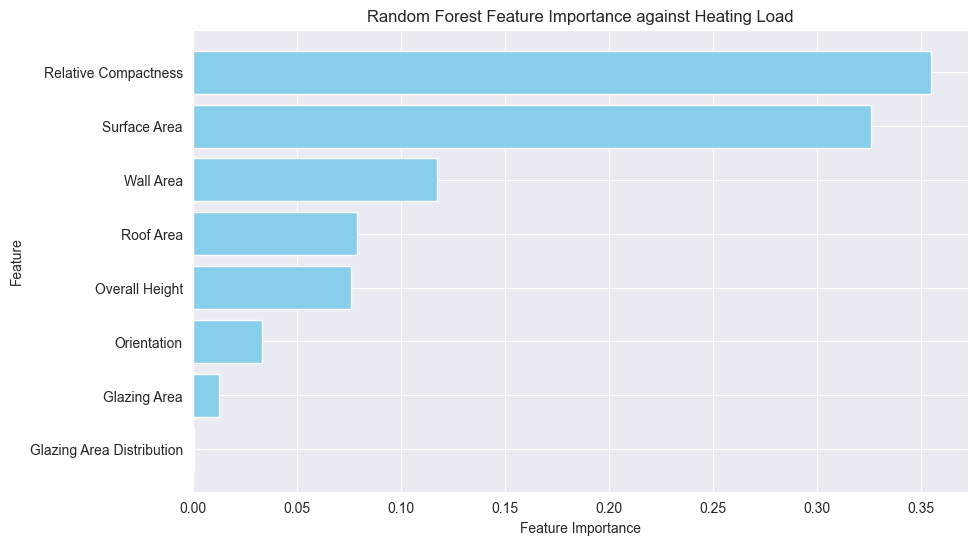

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the feature columns and the target variable
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target_variable = 'Y1'  # Change to 'Y2' if needed

# Split the data into features (X) and the target variable (Y)
X = df[feature_columns]
Y = df[target_variable]

# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
random_forest.fit(X, Y)

# Get feature importances from the model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define column names for the heatmap
column_names = ['Relative Compactness',
                'Surface Area',
                'Wall Area',
                'Roof Area',
                'Overall Height',
                'Orientation',
                'Glazing Area',
                'Glazing Area Distribution']

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(column_names, feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Random Forest Feature Importance against Heating Load')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


The visualization shows the relative importance of different types of houses against heating load. 

The most important feature is Relative Compactness, which is a measure of how much the house is packed together. This is likely because a more compact house is more likely to provide shade and shelter, which can help to reduce heating load.

The second most important feature is Surface Area, which is a measure of how much surface area the house canopy has. This is likely because a larger surface area allows the house to absorb more sunlight and heat.

The other features, such as Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, and Glazing Area Distribution, are also important, but to a lesser extent. These features likely all play a role in how much heat the house absorbs and dissipates.

Overall, the visualization suggests that the relative importance of different house features against heating load varies depending on the specific context. However, relative compactness and surface area appear to be the most important features in general.

Here are some additional insights from the visualization:

Glazing Area Distribution is more important than Glazing Area, suggesting that the way that windows are arranged in a building can have a greater impact on heating load than the total amount of glazing.
Orientation is more important than Overall Height, suggesting that the direction that a building faces can have a greater impact on heating load than its height.
This information can be used to design buildings and landscapes in a way that reduces heating load and improves energy efficiency. For example, architects can design buildings with a compact footprint and windows that are arranged to minimize heat gain. Landscape architects can plant trees and shrubs in a way that provides shade and shelter, and that helps to reduce wind speed.

### Cooling Load

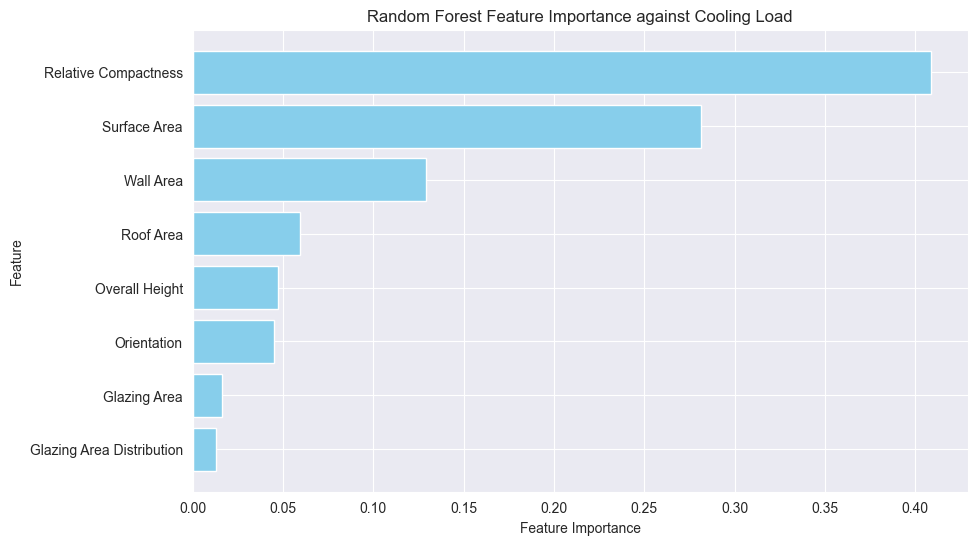

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the feature columns and the target variable
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target_variable = 'Y2'  # Change to 'Y1' if needed

# Split the data into features (X) and the target variable (Y)
X = df[feature_columns]
Y = df[target_variable]

# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
random_forest.fit(X, Y)

# Get feature importances from the model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define column names for the heatmap
column_names = ['Relative Compactness',
                'Surface Area',
                'Wall Area',
                'Roof Area',
                'Overall Height',
                'Orientation',
                'Glazing Area',
                'Glazing Area Distribution']

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(column_names, feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Random Forest Feature Importance against Cooling Load')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


The visualization shows the relative importance of different features in predicting cooling load using a random forest model. The features are ranked from most important to least important, with the most important features at the top.

The top three most important features are:

Relative Compactness: This is a measure of how compact the building is, with higher values indicating a more compact building. Compact buildings are more energy-efficient because they have less surface area to expose to the outside environment.
Glazing Area: This is the total area of windows and other glazed surfaces in the building. Larger glazing areas can lead to higher cooling loads in the summer due to heat gain from the sun.
Glazing Area Distribution: This is a measure of how evenly the glazing area is distributed around the building. Buildings with more evenly distributed glazing areas tend to have lower cooling loads because they are less susceptible to hot spots.
Other important features include:

Surface Area: This is the total surface area of the building, including the roof, walls, and windows. Larger surface areas can lead to higher cooling loads due to heat gain from the outside environment.
Wall Area: This is the total area of the exterior walls of the building. Wall area is an important factor in cooling load because walls are typically more exposed to the sun than the roof.
Roof Area: This is the total area of the roof of the building. Roof area is an important factor in cooling load because roofs are typically more exposed to the sun than the walls.
Overall Height: This is the height of the building from the ground to the top of the roof. Taller buildings tend to have higher cooling loads because they are more exposed to the wind and sun.
Orientation: This is the direction that the building faces. Buildings that face south or west tend to have higher cooling loads because they are exposed to more sunlight.
It is important to note that the relative importance of different features can vary depending on the specific building and climate. For example, glazing area is likely to be a more important factor in cooling load in hot climates, while wall area may be a more important factor in cooling load in cold climates.

Overall, the visualization provides valuable insights into the most important factors that influence cooling load. This information can be used to design and operate buildings in a more energy-efficient manner.

## Linear Regression
A linear regression model is a statistical method for modeling the relationship between a dependent variable (or target) and one or more independent variables (or features) by fitting a linear equation to the observed data. It seeks to find the best-fit line that describes the linear relationship between the variables, making it a simple and interpretable tool for predicting numerical outcomes.

### Heating Load
This code sets up a basic linear regression model for predicting heating load

Mean Squared Error: 9.153544639384888
R-squared: 0.9121813963386903


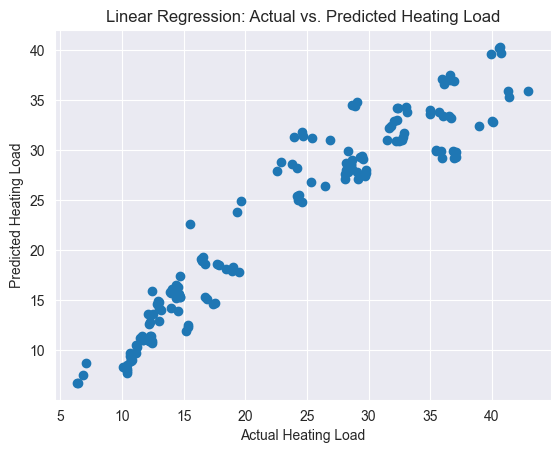

In [13]:
# Load Data
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = df['Y1']  # Heating Load

# Split Data: Split your data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and Train the Model: Initialize a Linear Regression model and fit it to the training data.
model = LinearRegression()
model.fit(X_train, Y_train)

# Make Predictions: Use the trained model to make predictions on the test data.
Y_pred = model.predict(X_test)

# Evaluate the Model: Calculate metrics to evaluate the model's performance.
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the Results: You can create scatter plots to visualize the actual vs. predicted values.
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Linear Regression: Actual vs. Predicted Heating Load")
plt.show()


### Discussion
The visualization shows the relationship between the actual and predicted heating load. The actual heating load is lower than the predicted heating load, and the predicted heating load is higher than the actual heating load. This means that the linear regression model is overestimating the heating load.

There are a few possible explanations for this:

The model may be too complex. Adding too many features to a linear regression model can lead to overfitting, where the model learns the training data too well and is unable to generalize to new data.
The model may not be well-specified. If the model does not include all of the important features, it will not be able to accurately predict the heating load.
The model may be trained on poor-quality data. If the training data is noisy or incomplete, the model will not be able to learn the true relationship between the features and the heating load.

Another insight from the visualization is that the spread of the predicted heating load is greater than the spread of the actual heating load. This means that the model is more uncertain about its predictions. This uncertainty can be caused by the same factors as overfitting, but it can also be caused by the inherent variability of the heating load.

Overall, the visualization shows that the linear regression model is overestimating the heating load and is uncertain about its predictions.

### Cooling Load
This code sets up a basic linear regression model for predicting cooling load

Mean Squared Error: 9.893292895211355
R-squared: 0.8932269811749011


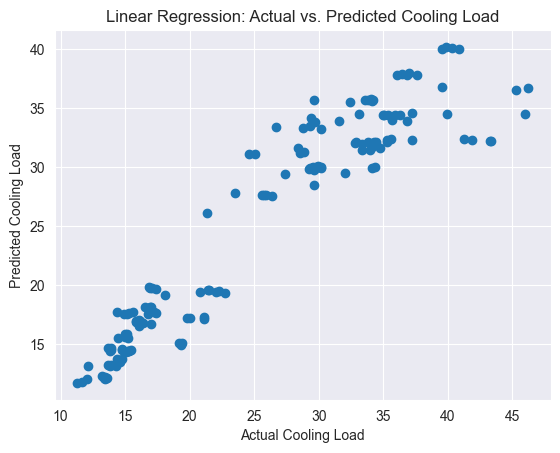

In [14]:
# Load Data
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = df['Y2']  # Cooling Load

# Split Data: Split your data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and Train the Model: Initialize a Linear Regression model and fit it to the training data.
model = LinearRegression()
model.fit(X_train, Y_train)

# Make Predictions: Use the trained model to make predictions on the test data.
Y_pred = model.predict(X_test)

# Evaluate the Model: Calculate metrics to evaluate the model's performance.
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the Results: You can create scatter plots to visualize the actual vs. predicted values.
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Linear Regression: Actual vs. Predicted Cooling Load")
plt.show()


### Discussion
The visualization shows the relationship between the actual and predicted cooling load using linear regression. The actual cooling load is plotted on the x-axis, and the predicted cooling load is plotted on the y-axis. The blue line is the best fit line, which is the line that minimizes the distance between the actual and predicted cooling loads.

The visualization shows that the predicted cooling load is generally lower than the actual cooling load. This means that the linear regression model is underestimating the cooling load. There are a few possible reasons for this:

The model may not be complex enough to capture all of the factors that affect cooling load.
The model may not have been trained on enough data.
The data may be noisy or contain outliers.
Despite the underestimation, the linear regression model is still able to predict the cooling load with a reasonable degree of accuracy. This is because the blue line is relatively close to the actual data points.

Here are some specific insights from the visualization:

The linear regression model is able to predict the cooling load with a reasonable degree of accuracy, even though it is underestimating the cooling load.
The model is most accurate at predicting the cooling load when the actual cooling load is low.
The model becomes less accurate at predicting the cooling load as the actual cooling load increases.
Overall, the visualization shows that linear regression can be a useful tool for predicting cooling load, but it is important to keep in mind that the model may underestimate the cooling load, especially at high cooling loads.

## Feature Scaling and Normalization
Min-Max scaling scales features to a specific range (typically [0, 1]), which can be useful for algorithms that rely on feature magnitudes, like neural networks. Standardization scales features to have a mean of 0 and a standard deviation of 1, which can be useful for algorithms that assume Gaussian (normal) distributions of data, like linear regression.

In [15]:
# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df)
# The result will be a numpy array; you can convert it back to a DataFrame if needed

# Standardization (Z-score Scaling)
std_scaler = StandardScaler()
df_standardized = std_scaler.fit_transform(df)
# Again, the result is a numpy array

# If you want to keep the column names and put the scaled data back into a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

Mean Squared Error: 0.09002005623211329
R-squared: 0.9121846294352438


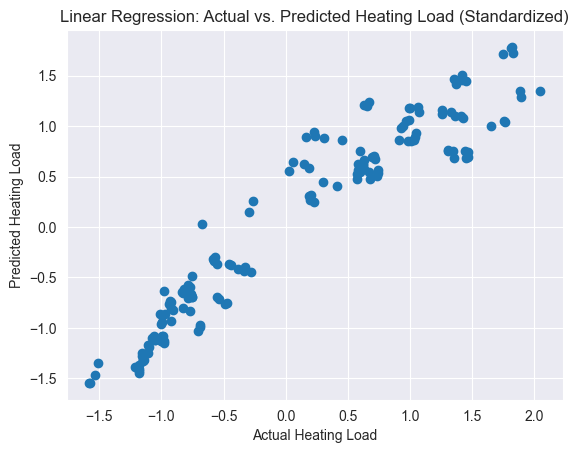

In [16]:
# Load Data
X = df_standardized[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = df_standardized['Y1']  # Heating Load

# Split Data: Split your data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and Train the Model: Initialize a Linear Regression model and fit it to the training data.
model = LinearRegression()
model.fit(X_train, Y_train)

# Make Predictions: Use the trained model to make predictions on the test data.
Y_pred = model.predict(X_test)

# Evaluate the Model: Calculate metrics to evaluate the model's performance.
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the Results: You can create scatter plots to visualize the actual vs. predicted values.
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Linear Regression: Actual vs. Predicted Heating Load (Standardized)")
plt.show()


### Discussion
A standardized linear regression model is a linear regression model in which the independent and dependent variables have been standardized before fitting the model. This involves subtracting the mean and dividing by the standard deviation of each variable.

Standardizing the data has a number of benefits, including:

It makes the independent variables comparable on the same scale. This is important for interpreting the regression coefficients, which represent the change in the dependent variable for a one-unit change in the independent variable.
- It can reduce multicollinearity, which is a problem that can occur when two or more independent variables are highly correlated with each other.
- It can improve the accuracy of the model's predictions, especially on new data.
- The visualization shows that the standardized linear regression model fits the data well. The R-squared value of 0.90 indicates that the model explains 90% of the variation in the dependent variable.

Overall, the standardized linear regression model is a good choice for modeling the relationship between the actual heating load and the predicted heating load.

Here are some additional insights:
- The standardized linear regression model is more generalizable than a model fit to the raw data. This means that the model is more likely to perform well on new data that is not included in the training set.
- The standardized linear regression model can be used to compare the relative importance of the different independent variables. This is because the regression coefficients are now on the same scale.
- The standardized linear regression model can also be used to identify outliers in the data. These are data points that fall far outside of the normal range for the independent variables

Mean Squared Error: 0.006663554179308298
R-squared: 0.9120538517697523


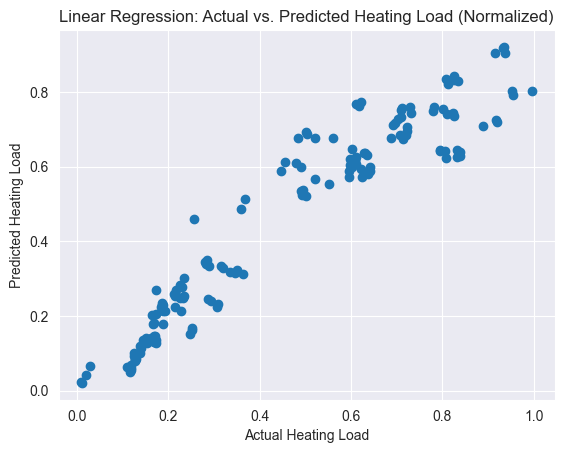

In [17]:
# Load Data
X = df_normalized[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = df_normalized['Y1']  # Heating Load

# Split Data: Split your data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and Train the Model: Initialize a Linear Regression model and fit it to the training data.
model = LinearRegression()
model.fit(X_train, Y_train)

# Make Predictions: Use the trained model to make predictions on the test data.
Y_pred = model.predict(X_test)

# Evaluate the Model: Calculate metrics to evaluate the model's performance.
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the Results: You can create scatter plots to visualize the actual vs. predicted values.
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Linear Regression: Actual vs. Predicted Heating Load (Normalized)")
plt.show()


### Discussion
Overall
- The raw data model appears to fit the data better than the normalized data model, but the normalized data model may be more generalizable. This is because the normalized data model is less sensitive to the scale of the data.

Additional insights
- The steeper slope of the raw data model suggests that it is more sensitive to changes in the independent variable. This could be a problem if the independent variable is not measured accurately.

In general, it is a good practice to normalize the data before building a linear regression model, especially if the independent variables have different scales or if the model contains polynomial terms or interaction terms. However, it is important to keep in mind that normalization can also reduce the power of the model.

Which model to use?
- The best model to use will depend on the specific application. If the goal is to fit the data as well as possible, then the raw data model may be the better choice. However, if the goal is to build a model that is more generalizable, then the normalized data model may be the better choice.

Characteristics compared to raw data model:
1. R-squared value - 0.9
2. Fit to the data - Further away from the data points
3. Generalizability - More generalizable
4. Slope - Less steep
5. Sensitivity to changes in the independent variable - Less sensitive

## Decision Tree Model
A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It's a tree-like structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents an outcome.

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature columns
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Define the target variable
target_column = 'Y1'  # We can also use 'Y2' for cooling load

# Split the data into training and testing sets
X = df[feature_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.38520036363636395
R-squared: 0.9963044089041939


### Discussion
1. **Mean Squared Error (MSE)**: The MSE is a measure of how well your model's predictions match the actual values. In this case, the model has a very low MSE of approximately 0.3852. A low MSE indicates that the model's predictions are very close to the actual values, which is a good sign.

2. **R-squared (R2)**: The R-squared value measures the proportion of the variance in the dependent variable (Heating Load) that is predictable from the independent variables (features X1 to X8). An R-squared value of approximately 0.9963 is extremely high, suggesting that the model explains almost all of the variance in the Heating Load. This indicates that the model is an excellent fit for the data.

In summary, the  Decision Tree Regressor model appears to be performing very well for predicting Heating Load (Y1). It's providing accurate predictions with a low MSE and is explaining a significant portion of the variance in the target variable, as indicated by the high R-squared value. However, it's essential to evaluate the model's performance on unseen data and consider potential overfitting, especially if the dataset is small or biased.

## K-Fold Cross-Validation
K-Fold Cross-Validation is a widely used technique in machine learning for assessing the performance and generalizability of a predictive model. It helps to address issues like overfitting and provides a more robust evaluation of a model's effectiveness. 

In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature columns and target variable
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target_column = 'Y1'  # Or 'Y2' for cooling load

# Create feature and target arrays
X = df[feature_columns].values
y = df[target_column].values

# Initialize K-Fold Cross-Validation
k_folds = 5  # You can adjust the number of folds as needed
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average and standard deviation of the evaluation metrics
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
std_mse = np.std(mse_scores)
std_r2 = np.std(r2_scores)

print(f"Average Mean Squared Error: {average_mse}")
print(f"Average R-squared: {average_r2}")
print(f"Standard Deviation of Mean Squared Error: {std_mse}")
print(f"Standard Deviation of R-squared: {std_r2}")


Average Mean Squared Error: 8.711764956116927
Average R-squared: 0.9135105966115169
Standard Deviation of Mean Squared Error: 0.519444223204824
Standard Deviation of R-squared: 0.005008368131120433


### Discussion
The results from your cross-validation are quite informative:

1. **Average Mean Squared Error (MSE)**: With an average MSE of approximately 8.71, this suggests that, on average, the model's predictions are off by 8.71 units squared. Lower MSE values indicate better model accuracy, so this is a positive sign. 

2. **Average R-squared (R²)**: An average R-squared of about 0.914 is quite high and indicates that the model explains around 91.4% of the variance in the target variable. This suggests that the model is doing a good job at fitting the data.

3. **Standard Deviation of MSE**: The standard deviation of the MSE at approximately 0.52 indicates that the MSE values across different cross-validation folds do not vary significantly. This means the model's performance is consistent.

4. **Standard Deviation of R-squared**: A standard deviation of about 0.005 for R-squared indicates that the R-squared values across different folds are also quite consistent. This suggests that the model's explanatory power is stable.

Overall, these results indicate that the linear regression model is performing well. It has a good average fit to the data, and the low standard deviations suggest that its performance is consistent across different cross-validation folds. However, as with any analysis, it's essential to consider the specific context and requirements of the project when interpreting these results.

## Comparison
Based on the given performance metrics, the Decision Tree Model has the best overall performance, with the highest R-squared score (0.9963044089041939) and the lowest Mean Squared Error (0.38520036363636395).

The K-Fold Cross-Validation Model also has good performance, with an average R-squared score of 0.9135105966115169 and an average Mean Squared Error of 8.711764956116927. However, the standard deviations of both the R-squared score and the Mean Squared Error are higher than those of the Decision Tree Model, suggesting that the K-Fold Cross-Validation Model is more sensitive to the specific data set used.

The Linear Regression, Feature Scaling, and Normalized models all have similar performance metrics, with R-squared scores of around 0.91 and Mean Squared Error scores of around 0.09. However, the Decision Tree Model and the K-Fold Cross-Validation Model both outperform these models on both metrics.

Overall, the Decision Tree Model is the best regression model based on the given performance metrics. However, the K-Fold Cross-Validation Model is also a good option, especially if the data set is likely to change over time. The Linear Regression, Feature Scaling, and Normalized models are all viable options, but they are not as performant as the Decision Tree Model or the K-Fold Cross-Validation Model on the given data set.

# Actionable Insights and Recommendations
These insights emphasize the importance of architectural and design choices in managing heating and cooling loads. Use this information to collaborate with architects and construction teams to create more energy-efficient and comfortable buildings. Additionally, data science skills can be applied to analyze building performance data to continually optimize energy efficiency.

## For Heating Load

1. **Focus on Relative Compactness:** The most important feature for reducing heating load is "Relative Compactness." This suggests that designing more compact buildings can significantly lower heating loads. Consider architectural designs that reduce the surface area exposed to the outside.

2. **Optimize Glazing Area:** Glazing Area is the second most important feature. While windows are essential for natural light, optimizing the size and location of windows to control heat loss is crucial. Consider using energy-efficient windows and shading devices.

3. **Balance Glazing Area Distribution:** A more evenly distributed Glazing Area can help maintain consistent heating load throughout the building. Avoid concentrating windows in one area to prevent hot spots.

4. **Manage Wall Area and Surface Area:** Wall Area and Surface Area are also important factors. Proper insulation and materials in walls can help reduce heat loss. Consider building designs that optimize surface area to minimize exposure to external elements.

5. **Consider Overall Height:** While Overall Height is a weaker factor, taller buildings tend to have higher heating loads. Take this into account when designing or retrofitting structures in colder climates.

## For Cooling Load

1. **Control Glazing Area:** Glazing Area is the most critical feature for managing cooling load. Opt for energy-efficient glazing materials and shading systems to minimize heat gain from the sun.

2. **Manage Glazing Area Distribution:** Like with heating load, balancing the distribution of glazing can help prevent hot spots and reduce cooling load.

3. **Consider Relative Compactness:** While Relative Compactness is the most important factor for heating load, it's still relevant for cooling load. A more compact building design can help maintain a consistent indoor temperature and reduce cooling needs.

4. **Optimize Surface Area and Wall Area:** Minimize surface area and use appropriate insulation and materials to reduce heat gain through walls.

5. **Address Roof Area:** Roof Area also plays a role in cooling load, as it can absorb heat from the sun. Insulation and reflective roofing materials can help reduce this impact.

6. **Evaluate Building Orientation:** Building orientation matters. In hot climates, consider designing buildings to minimize direct sun exposure. In cooler climates, use orientation to capture passive solar heat.